# SRFP AQI data extra plots for Delhi city

In [2]:
import sys
sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime
from scipy import stats

# Use seaborn style defaults and set default figure size
plt.style.use('seaborn-pastel')
sns.set_theme(style="ticks", color_codes=True)

In [3]:
from functions import rplot, qqplot, ccmplot

In [4]:
dfmod = pd.read_csv('data/aqi_data_mod.csv')
dfobs = pd.read_csv('data/aqi_data_obs.csv')

In [5]:
dfmod['datetime'] = pd.to_datetime(dfmod.date) + pd.to_timedelta(dfmod.hour)
dfobs['datetime'] = pd.to_datetime(dfobs.date) + pd.to_timedelta(dfobs.hour)

In [6]:
dfmod = dfmod.drop(['date', 'hour'], axis=1)
dfobs = dfobs.drop(['date', 'hour'], axis=1)

In [7]:
dfmod = dfmod.set_index(dfmod.datetime)
dfobs = dfobs.set_index(dfobs.datetime)

In [8]:
dfobs.head()

,obs_PM2.5,obs_PM2.5_stdev,obs_PM10,obs_PM10_stdev,datetime
datetime,,,,,
2020-11-01 00:00:00,387.90,158.73,561.44,165.77,2020-11-01 00:00:00
2020-11-01 01:00:00,348.11,143.39,486.04,159.66,2020-11-01 01:00:00
2020-11-01 02:00:00,326.03,120.39,516.67,134.42,2020-11-01 02:00:00
2020-11-01 03:00:00,302.90,111.29,514.41,125.31,2020-11-01 03:00:00
2020-11-01 04:00:00,309.05,104.38,520.55,102.16,2020-11-01 04:00:00


In [9]:
dfobs = dfobs.drop(['datetime'], axis = 1)

In [10]:
# Do interpolatoin of the observed data

dfobs = dfobs.interpolate(method = 'time')

In [11]:
dfobs.isna().sum()

obs_PM2.5          0
obs_PM2.5_stdev    0
obs_PM10           0
obs_PM10_stdev     0
dtype: int64

In [12]:
df = pd.concat([dfmod, dfobs], axis=1)

In [13]:
dfnov = df.loc["2020-11-01":"2020-11-30"]
dfdec = df.loc["2020-12-01":"2020-12-31"]
dfjan = df.loc["2021-01-01":"2021-01-31"]

In [14]:
dfnov

,mod_PM2.5,mod_PM2.5_stdev,mod_PM10,mod_PM10_stdev,datetime,obs_PM2.5,obs_PM2.5_stdev,obs_PM10,obs_PM10_stdev
datetime,,,,,,,,,
2020-11-01 00:00:00,152.61,51.64,241.71,105.98,2020-11-01 00:00:00,387.90,158.73,561.44,165.77
2020-11-01 01:00:00,159.82,53.31,254.49,111.38,2020-11-01 01:00:00,348.11,143.39,486.04,159.66
2020-11-01 02:00:00,160.04,51.57,252.47,109.05,2020-11-01 02:00:00,326.03,120.39,516.67,134.42
2020-11-01 03:00:00,156.73,40.47,242.03,87.21,2020-11-01 03:00:00,302.90,111.29,514.41,125.31
2020-11-01 04:00:00,156.32,41.95,232.03,84.02,2020-11-01 04:00:00,309.05,104.38,520.55,102.16
...,...,...,...,...,...,...,...,...,...
2020-11-30 19:00:00,264.13,127.55,476.49,252.76,2020-11-30 19:00:00,264.66,85.95,434.93,126.75
2020-11-30 20:00:00,236.13,102.84,421.26,207.41,2020-11-30 20:00:00,257.07,80.09,426.47,128.26
2020-11-30 21:00:00,225.05,94.71,395.51,188.52,2020-11-30 21:00:00,237.17,79.33,391.33,123.03


### Q-Q plot

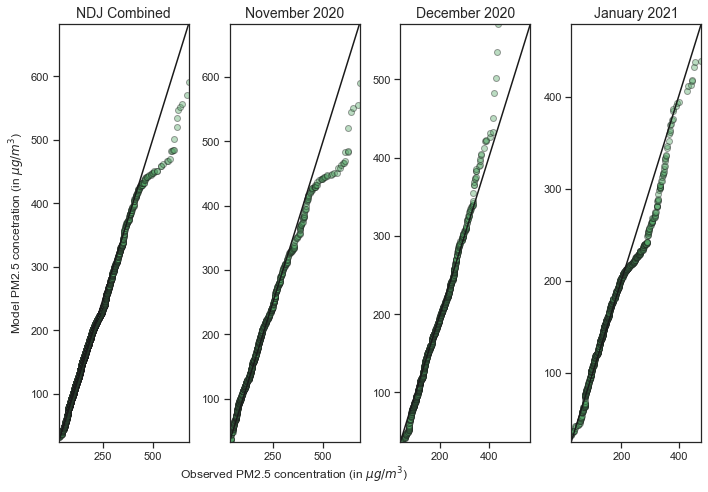

In [15]:
# Q-Q plot for PM2.5 concentration

fig = plt.figure(figsize=(10,7))

plt.subplot(141)
qqplot.plot(df['obs_PM2.5'], df['mod_PM2.5'], c='g', alpha=0.4, edgecolor='k', rug=False)
# plt.xlabel('Observed PM2.5 concentration (in $\mu g/m^3$)', fontsize=12)
plt.ylabel('Model PM2.5 concetration (in $\mu g/m^3$)', fontsize=12)
plt.title('NDJ Combined',fontsize=14)

plt.subplot(142)
qqplot.plot(dfnov['obs_PM2.5'], dfnov['mod_PM2.5'], c='g', alpha=0.4, edgecolor='k', rug=False)
plt.xlabel('Observed PM2.5 concentration (in $\mu g/m^3$)', fontsize=12)
# plt.ylabel('Model PM2.5', fontsize=16)
plt.title('November 2020', fontsize=14)

plt.subplot(143)
qqplot.plot(dfdec['obs_PM2.5'], dfdec['mod_PM2.5'], c='g', alpha=0.4, edgecolor='k', rug=False)
# plt.xlabel('Observed PM2.5', fontsize=16)
# plt.ylabel('Model PM2.5', fontsize=16)
plt.title('December 2020', fontsize=14)

plt.subplot(144)
qqplot.plot(dfjan['obs_PM2.5'], dfjan['mod_PM2.5'], c='g', alpha=0.4, edgecolor='k', rug=False)
# plt.xlabel('Observed PM2.5', fontsize=16)
# plt.ylabel('Model PM2.5', fontsize=16)
plt.title('January 2021', fontsize=14)

# fig.suptitle('Q-Q Plot for PM2.5 concentration (in $\mu g/m^3$) in Delhi', fontsize=27, y=0.99)
fig.tight_layout()
plt.savefig('./images/qqplot.plot25.pdf', dpi=300)

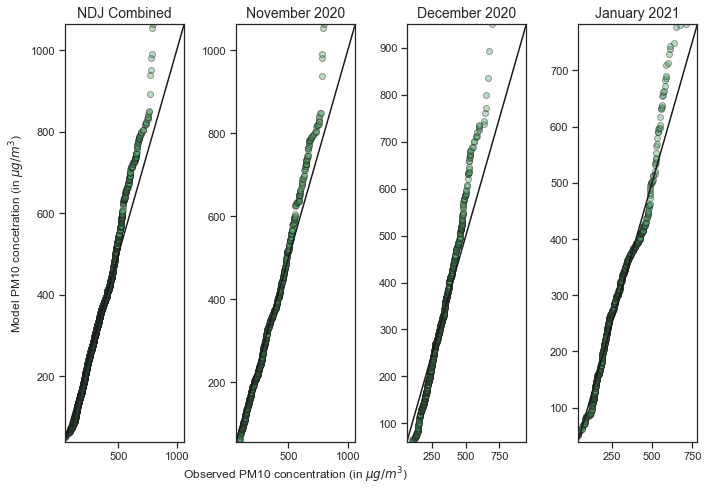

In [16]:
# Q-Q plot for PM10 concentration

fig = plt.figure(figsize=(10,7))

plt.subplot(141)
qqplot.plot(df['obs_PM10'], df['mod_PM10'], c='g', alpha=0.4, edgecolor='k', rug=False)
# plt.xlabel('Observed PM10 concentration (in $\mu g/m^3$)', fontsize=12)
plt.ylabel('Model PM10 concetration (in $\mu g/m^3$)', fontsize=12)
plt.title('NDJ Combined',fontsize=14)

plt.subplot(142)
qqplot.plot(dfnov['obs_PM10'], dfnov['mod_PM10'], c='g', alpha=0.4, edgecolor='k', rug=False)
plt.xlabel('Observed PM10 concentration (in $\mu g/m^3$)', fontsize=12)
# plt.ylabel('Model PM10', fontsize=16)
plt.title('November 2020', fontsize=14)

plt.subplot(143)
qqplot.plot(dfdec['obs_PM10'], dfdec['mod_PM10'], c='g', alpha=0.4, edgecolor='k', rug=False)
# plt.xlabel('Observed PM10', fontsize=16)
# plt.ylabel('Model PM10', fontsize=16)
plt.title('December 2020', fontsize=14)

plt.subplot(144)
qqplot.plot(dfjan['obs_PM10'], dfjan['mod_PM10'], c='g', alpha=0.4, edgecolor='k', rug=False)
# plt.xlabel('Observed PM10', fontsize=16)
# plt.ylabel('Model PM10', fontsize=16)
plt.title('January 2021', fontsize=14)

# fig.suptitle('Q-Q Plot for PM10 concentration (in $\mu g/m^3$) in Delhi', fontsize=27, y=0.99)
fig.tight_layout()
plt.savefig('./images/qqplot.plot10.pdf', dpi=300)

### Scatter - Correlation Plot

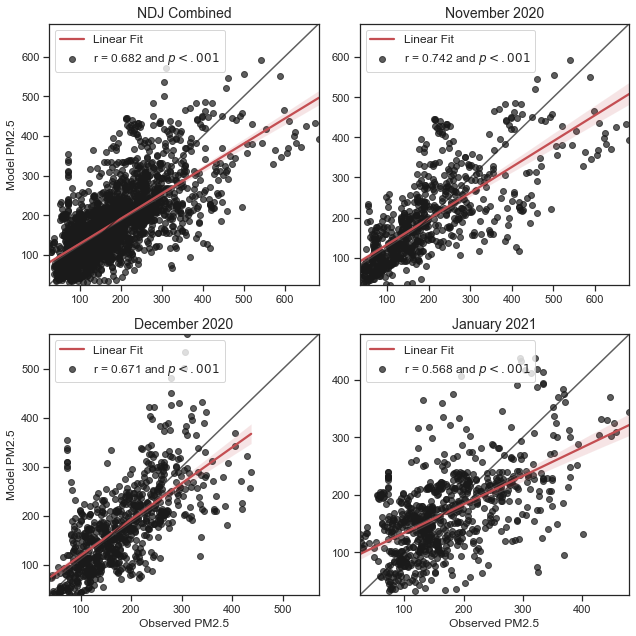

In [17]:
# Scatter-Correlation plot for PM2.5 concentration

fig = plt.figure(figsize=(9,9))

plt.subplot(221)
rplot.plot(df, df['obs_PM2.5'], df['mod_PM2.5'], color='k', alpha=0.7)
# plt.xlabel('Observed PM2.5', fontsize=16)
plt.ylabel('Model PM2.5', fontsize=12)
plt.title('NDJ Combined',fontsize=14)

plt.subplot(222)
rplot.plot(dfnov, dfnov['obs_PM2.5'], dfnov['mod_PM2.5'], color='k', alpha=0.7)
# plt.xlabel('Observed PM2.5', fontsize=16)
# plt.ylabel('Model PM2.5', fontsize=16)
plt.title('November 2020', fontsize=14)

plt.subplot(223)
rplot.plot(dfdec, dfdec['obs_PM2.5'], dfdec['mod_PM2.5'], color='k', alpha=0.7)
plt.xlabel('Observed PM2.5', fontsize=12)
plt.ylabel('Model PM2.5', fontsize=12)
plt.title('December 2020', fontsize=14)

plt.subplot(224)
rplot.plot(dfdec, dfjan['obs_PM2.5'], dfjan['mod_PM2.5'], color='k', alpha=0.7)
plt.xlabel('Observed PM2.5', fontsize=12)
# plt.ylabel('Model PM2.5', fontsize=16)
plt.title('January 2021', fontsize=14)

# fig.suptitle('Scatter Plots for PM2.5 concentration (in $\mu g/m^3$) in Delhi', fontsize=27, y=0.99)
fig.tight_layout()
plt.savefig('./images/rplot.plot25.pdf', dpi=300)

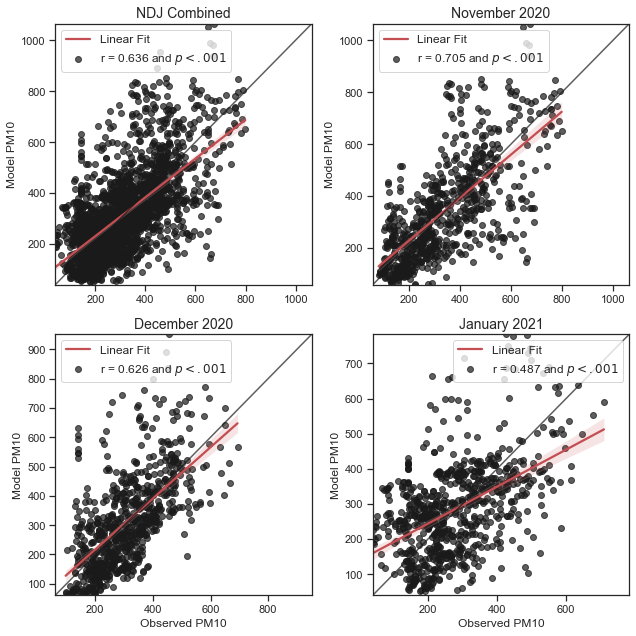

In [18]:
# Scatter-Correlation plot for PM10 concentration

fig = plt.figure(figsize=(9,9))

plt.subplot(221)
rplot.plot(df, df['obs_PM10'], df['mod_PM10'], color='k', alpha=0.7)
# plt.xlabel('Observed PM10', fontsize=16)
plt.ylabel('Model PM10', fontsize=12)
plt.title('NDJ Combined',fontsize=14)

plt.subplot(222)
rplot.plot(dfnov, dfnov['obs_PM10'], dfnov['mod_PM10'], color='k', alpha=0.7)
# plt.xlabel('Observed PM10', fontsize=16)
plt.ylabel('Model PM10', fontsize=12)
plt.title('November 2020', fontsize=14)

plt.subplot(223)
rplot.plot(dfdec, dfdec['obs_PM10'], dfdec['mod_PM10'], color='k', alpha=0.7)
plt.xlabel('Observed PM10', fontsize=12)
plt.ylabel('Model PM10', fontsize=12)
plt.title('December 2020', fontsize=14)

plt.subplot(224)
rplot.plot(dfdec, dfjan['obs_PM10'], dfjan['mod_PM10'], color='k', alpha=0.7)
plt.xlabel('Observed PM10', fontsize=12)
plt.ylabel('Model PM10', fontsize=12)
plt.title('January 2021', fontsize=14)

# fig.suptitle('Scatter Plots for PM10 concentration (in $\mu g/m^3$) in Delhi', fontsize=27, y=0.99)
fig.tight_layout()
plt.savefig('./images/rplot.plot10.pdf', dpi=300)

## Correlation plots of AQI with Meteorological data

In [46]:
metnov = pd.read_csv('./data/met_data_nov_utc.csv')
metdec = pd.read_csv('./data/met_data_dec_utc.csv')
metjan = pd.read_csv('./data/met_data_jan_utc.csv')

In [47]:
metnov['datetime'] = pd.to_datetime(metnov.date) + pd.to_timedelta(metnov.hour)
metdec['datetime'] = pd.to_datetime(metdec.time)
metjan['datetime'] = pd.to_datetime(metjan.datetime)

In [48]:
metnov = metnov.set_index(metnov.datetime)
metdec = metdec.set_index(metdec.datetime)
metjan = metjan.set_index(metjan.datetime)

metnov.drop(['date', 'hour', 'datetime'], axis=1, inplace=True)
metdec.drop(['time', 'datetime'], axis=1, inplace=True)
metjan.drop(['datetime'], axis=1, inplace=True)

In [49]:
metjan.head()

,mod_temp,obs_temp,mod_wd,obs_wd,mod_ws,obs_ws,mod_swdown,obs_swlower,obs_swupper,obs_lwupper,obs_lwlower
datetime,,,,,,,,,,,
2021-01-01 00:00:00,NaN,6.682222,NaN,79.756946,NaN,0.900347,NaN,3.510417,-0.786550,618.516667,620.381667
2021-01-01 01:00:00,NaN,6.623194,NaN,107.330557,NaN,1.106306,NaN,4.742067,15.913250,615.495000,617.031667
2021-01-01 02:00:00,NaN,7.471944,NaN,112.248613,NaN,0.464417,NaN,12.202367,106.011333,587.153333,589.123333
2021-01-01 03:00:00,NaN,10.370833,NaN,104.988888,NaN,0.823708,NaN,23.618167,257.441667,524.011667,544.338333
2021-01-01 04:00:00,NaN,13.849861,NaN,138.116665,NaN,1.378944,NaN,37.442667,379.663333,458.161667,504.655000


In [50]:
# Add the missing values of datetime in November and December as NaN

idx_nov = pd.date_range('2020-11-01 00:00:00','2020-11-30 23:00:00', freq='H')
idx_dec = pd.date_range('2020-12-01 00:00:00','2020-12-31 23:00:00', freq='H')

metnov = metnov.reindex(idx_nov, fill_value=np.nan)
metdec = metdec.reindex(idx_dec, fill_value=np.nan)

In [51]:
met = pd.concat([metnov, metdec, metjan], axis=0)

In [52]:
met.head()

,mod_temp,obs_temp,mod_wd,obs_wd,mod_ws,obs_ws,mod_swdown,obs_swlower,obs_swupper,obs_lwupper,obs_lwlower
2020-11-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-11-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-11-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-11-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-11-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
met.to_csv(r'./data/met_data_cleaned.csv',index=True)

In [54]:
met_aqi = pd.concat([df,met], axis=1)
met_aqi_nov = pd.concat([dfnov, metnov], axis=1)
met_aqi_dec = pd.concat([dfdec, metdec], axis=1)
met_aqi_jan = pd.concat([dfjan, metjan], axis=1)

In [55]:
met_aqi.drop(['datetime'], inplace=True, axis=1)
met_aqi_nov.drop(['datetime'], inplace=True, axis=1)
met_aqi_dec.drop(['datetime'], inplace=True, axis=1)
met_aqi_jan.drop(['datetime'], inplace=True, axis=1)

In [56]:
## Making new dataframes for each Met parameter with the pm2.5 and pm10 data

In [57]:
temp_aqi = met_aqi[['mod_PM2.5', 'mod_PM10', 'obs_PM2.5', 'obs_PM10', 'mod_temp', 'obs_temp']]
temp_aqi_nov = met_aqi_nov[['mod_PM2.5', 'mod_PM10', 'obs_PM2.5', 'obs_PM10', 'mod_temp', 'obs_temp']]
temp_aqi_dec = met_aqi_dec[['mod_PM2.5', 'mod_PM10', 'obs_PM2.5', 'obs_PM10', 'mod_temp', 'obs_temp']]
temp_aqi_jan = met_aqi_jan[['mod_PM2.5', 'mod_PM10', 'obs_PM2.5', 'obs_PM10', 'mod_temp', 'obs_temp']]

swdown_aqi = met_aqi[['mod_PM2.5', 'mod_PM10', 'obs_PM2.5', 'obs_PM10', 'mod_swdown', 'obs_swupper']]
swdown_aqi_nov = met_aqi_nov[['mod_PM2.5', 'mod_PM10', 'obs_PM2.5', 'obs_PM10', 'mod_swdown', 'obs_swupper']]
swdown_aqi_dec = met_aqi_dec[['mod_PM2.5', 'mod_PM10', 'obs_PM2.5', 'obs_PM10', 'mod_swdown', 'obs_swupper']]
swdown_aqi_jan = met_aqi_jan[['mod_PM2.5', 'mod_PM10', 'obs_PM2.5', 'obs_PM10', 'mod_swdown', 'obs_swupper']]

wd_aqi = met_aqi[['mod_PM2.5', 'mod_PM10', 'obs_PM2.5', 'obs_PM10', 'mod_wd', 'obs_wd']]
wd_aqi_nov = met_aqi_nov[['mod_PM2.5', 'mod_PM10', 'obs_PM2.5', 'obs_PM10', 'mod_wd', 'obs_wd']]
wd_aqi_dec = met_aqi_dec[['mod_PM2.5', 'mod_PM10', 'obs_PM2.5', 'obs_PM10', 'mod_wd', 'obs_wd']]
wd_aqi_jan = met_aqi_jan[['mod_PM2.5', 'mod_PM10', 'obs_PM2.5', 'obs_PM10', 'mod_wd', 'obs_wd']]

ws_aqi = met_aqi[['mod_PM2.5', 'mod_PM10', 'obs_PM2.5', 'obs_PM10', 'mod_ws', 'obs_ws']]
ws_aqi_nov = met_aqi_nov[['mod_PM2.5', 'mod_PM10', 'obs_PM2.5', 'obs_PM10', 'mod_ws', 'obs_ws']]
ws_aqi_dec = met_aqi_dec[['mod_PM2.5', 'mod_PM10', 'obs_PM2.5', 'obs_PM10', 'mod_ws', 'obs_ws']]
ws_aqi_jan = met_aqi_jan[['mod_PM2.5', 'mod_PM10', 'obs_PM2.5', 'obs_PM10', 'mod_ws', 'obs_ws']]

In [58]:
wd_aqi.head()

,mod_PM2.5,mod_PM10,obs_PM2.5,obs_PM10,mod_wd,obs_wd
2020-11-01 00:00:00,152.61,241.71,387.90,561.44,NaN,NaN
2020-11-01 01:00:00,159.82,254.49,348.11,486.04,NaN,NaN
2020-11-01 02:00:00,160.04,252.47,326.03,516.67,NaN,NaN
2020-11-01 03:00:00,156.73,242.03,302.90,514.41,NaN,NaN
2020-11-01 04:00:00,156.32,232.03,309.05,520.55,NaN,NaN


### Plots

#### Temperature

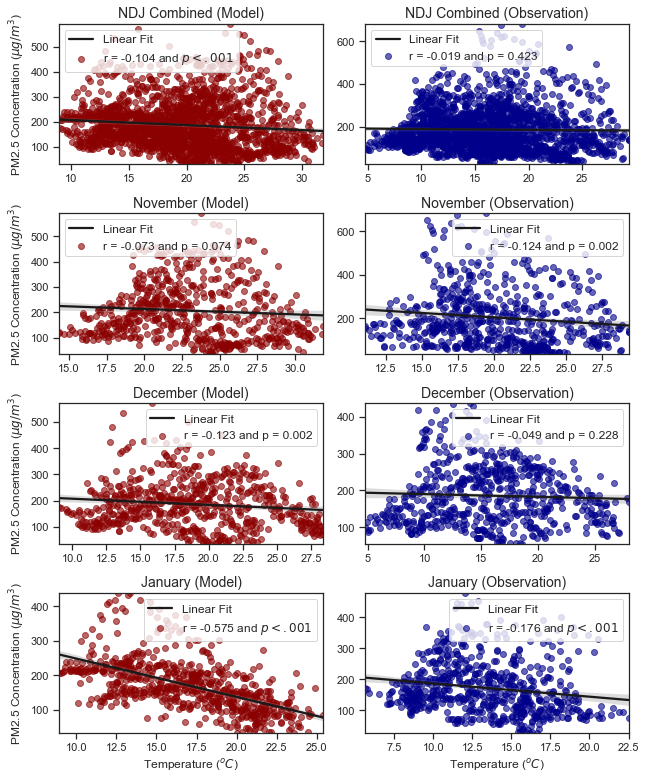

In [59]:
#### Temperature vs PM2.5

fig = plt.figure(figsize=(9,11))

# NDJ Combined
plt.subplot(421)
rplot.plot(temp_aqi, temp_aqi.dropna()['mod_temp'], temp_aqi.dropna()['mod_PM2.5'], type='compare', color='darkred', alpha=0.6)
# plt.xlabel("Temperature ($^{o}C$)", fontsize=12)
plt.ylabel("PM2.5 Concentration ($\mu g/m^3$)", fontsize=12)
plt.title("NDJ Combined (Model)", fontsize=14)

plt.subplot(422)
rplot.plot(temp_aqi, temp_aqi.dropna()['obs_temp'], temp_aqi.dropna()['obs_PM2.5'], type='compare', color='darkblue', alpha=0.6)
# plt.xlabel("Temperature ($^{o}C$)", fontsize=12)
# plt.ylabel("PM2.5 Concentration ($\mu g/m^3$)", fontsize=12)
plt.title("NDJ Combined (Observation)", fontsize=14)

# November
plt.subplot(423)
rplot.plot(temp_aqi_nov, temp_aqi_nov.dropna()['mod_temp'], temp_aqi_nov.dropna()['mod_PM2.5'], type='compare', color='darkred', alpha=0.6)
# plt.xlabel("Temperature ($^{o}C$)", fontsize=12)
plt.ylabel("PM2.5 Concentration ($\mu g/m^3$)", fontsize=12)
plt.title("November (Model)", fontsize=14)

plt.subplot(424)
rplot.plot(temp_aqi_nov, temp_aqi_nov.dropna()['obs_temp'], temp_aqi_nov.dropna()['obs_PM2.5'], type='compare', color='darkblue', alpha=0.6)
# plt.xlabel("Temperature ($^{o}C$)", fontsize=12)
# plt.ylabel("PM2.5 Concentration ($\mu g/m^3$)", fontsize=12)
plt.title("November (Observation)", fontsize=14)

# December
plt.subplot(425)
rplot.plot(temp_aqi_dec, temp_aqi_dec.dropna()['mod_temp'], temp_aqi_dec.dropna()['mod_PM2.5'], type='compare', color='darkred', alpha=0.6)
# plt.xlabel("Temperature ($^{o}C$)", fontsize=12)
plt.ylabel("PM2.5 Concentration ($\mu g/m^3$)", fontsize=12)
plt.title("December (Model)", fontsize=14)

plt.subplot(426)
rplot.plot(temp_aqi_dec, temp_aqi_dec.dropna()['obs_temp'], temp_aqi_dec.dropna()['obs_PM2.5'], type='compare', color='darkblue', alpha=0.6)
# plt.xlabel("Temperature ($^{o}C$)", fontsize=12)
# plt.ylabel("PM2.5 Concentration ($\mu g/m^3$)", fontsize=12)
plt.title("December (Observation)", fontsize=14)

# January
plt.subplot(427)
rplot.plot(temp_aqi_jan, temp_aqi_jan.dropna()['mod_temp'], temp_aqi_jan.dropna()['mod_PM2.5'], type='compare', color='darkred', alpha=0.6)
plt.xlabel("Temperature ($^{o}C$)", fontsize=12)
plt.ylabel("PM2.5 Concentration ($\mu g/m^3$)", fontsize=12)
plt.title("January (Model)", fontsize=14)

plt.subplot(428)
rplot.plot(temp_aqi_jan, temp_aqi_jan.dropna()['obs_temp'], temp_aqi_jan.dropna()['obs_PM2.5'], type='compare', color='darkblue', alpha=0.6)
plt.xlabel("Temperature ($^{o}C$)", fontsize=12)
# plt.ylabel("PM2.5 Concentration ($\mu g/m^3$)", fontsize=12)
plt.title("January (Observation)", fontsize=14)

# fig.suptitle('Scatter Plots for Temperature and PM2.5 Concentration', fontsize=27, y=0.99)
fig.tight_layout()
plt.savefig('./images/met_aqi_compare/temp25.pdf', dpi=300)

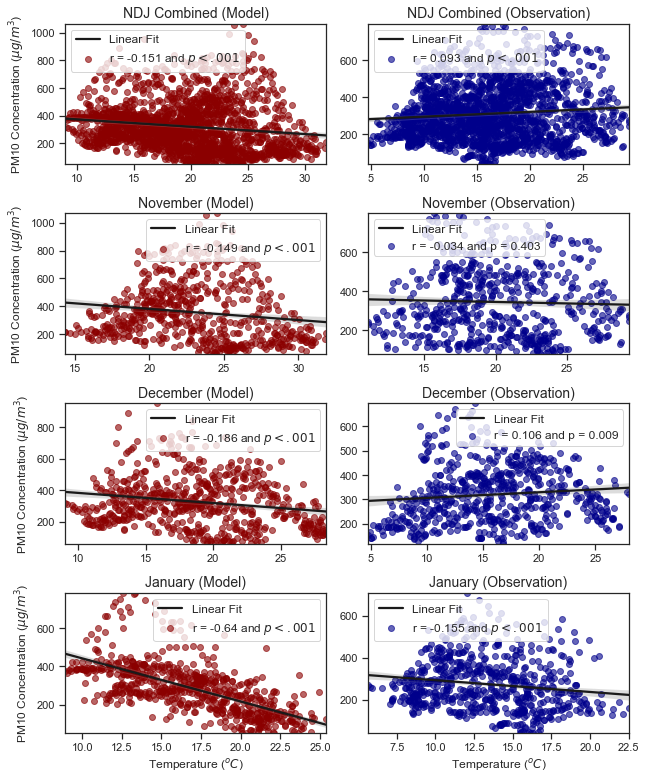

In [60]:
#### Temperature vs PM10

fig = plt.figure(figsize=(9,11))

# NDJ Combined
plt.subplot(421)
rplot.plot(temp_aqi, temp_aqi.dropna()['mod_temp'], temp_aqi.dropna()['mod_PM10'], type='compare', color='darkred', alpha=0.6)
# plt.xlabel("Temperature ($^{o}C$)", fontsize=12)
plt.ylabel("PM10 Concentration ($\mu g/m^3$)", fontsize=12)
plt.title("NDJ Combined (Model)", fontsize=14)

plt.subplot(422)
rplot.plot(temp_aqi, temp_aqi.dropna()['obs_temp'], temp_aqi.dropna()['obs_PM10'], type='compare', color='darkblue', alpha=0.6)
# plt.xlabel("Temperature ($^{o}C$)", fontsize=12)
# plt.ylabel("PM10 Concentration ($\mu g/m^3$)", fontsize=12)
plt.title("NDJ Combined (Observation)", fontsize=14)

# November
plt.subplot(423)
rplot.plot(temp_aqi_nov, temp_aqi_nov.dropna()['mod_temp'], temp_aqi_nov.dropna()['mod_PM10'], type='compare', color='darkred', alpha=0.6)
# plt.xlabel("Temperature ($^{o}C$)", fontsize=12)
plt.ylabel("PM10 Concentration ($\mu g/m^3$)", fontsize=12)
plt.title("November (Model)", fontsize=14)

plt.subplot(424)
rplot.plot(temp_aqi_nov, temp_aqi_nov.dropna()['obs_temp'], temp_aqi_nov.dropna()['obs_PM10'], type='compare', color='darkblue', alpha=0.6)
# plt.xlabel("Temperature ($^{o}C$)", fontsize=12)
# plt.ylabel("PM10 Concentration ($\mu g/m^3$)", fontsize=12)
plt.title("November (Observation)", fontsize=14)

# December
plt.subplot(425)
rplot.plot(temp_aqi_dec, temp_aqi_dec.dropna()['mod_temp'], temp_aqi_dec.dropna()['mod_PM10'], type='compare', color='darkred', alpha=0.6)
# plt.xlabel("Temperature ($^{o}C$)", fontsize=12)
plt.ylabel("PM10 Concentration ($\mu g/m^3$)", fontsize=12)
plt.title("December (Model)", fontsize=14)

plt.subplot(426)
rplot.plot(temp_aqi_dec, temp_aqi_dec.dropna()['obs_temp'], temp_aqi_dec.dropna()['obs_PM10'], type='compare', color='darkblue', alpha=0.6)
# plt.xlabel("Temperature ($^{o}C$)", fontsize=12)
# plt.ylabel("PM10 Concentration ($\mu g/m^3$)", fontsize=12)
plt.title("December (Observation)", fontsize=14)

# January
plt.subplot(427)
rplot.plot(temp_aqi_jan, temp_aqi_jan.dropna()['mod_temp'], temp_aqi_jan.dropna()['mod_PM10'], type='compare', color='darkred', alpha=0.6)
plt.xlabel("Temperature ($^{o}C$)", fontsize=12)
plt.ylabel("PM10 Concentration ($\mu g/m^3$)", fontsize=12)
plt.title("January (Model)", fontsize=14)

plt.subplot(428)
rplot.plot(temp_aqi_jan, temp_aqi_jan.dropna()['obs_temp'], temp_aqi_jan.dropna()['obs_PM10'], type='compare', color='darkblue', alpha=0.6)
plt.xlabel("Temperature ($^{o}C$)", fontsize=12)
# plt.ylabel("PM10 Concentration ($\mu g/m^3$)", fontsize=12)
plt.title("January (Observation)", fontsize=14)

# fig.suptitle('Scatter Plots for Temperature and PM10 Concentration', fontsize=27, y=0.99)
fig.tight_layout()
plt.savefig('./images/met_aqi_compare/temp10.pdf', dpi=300)

#### SWDOWN

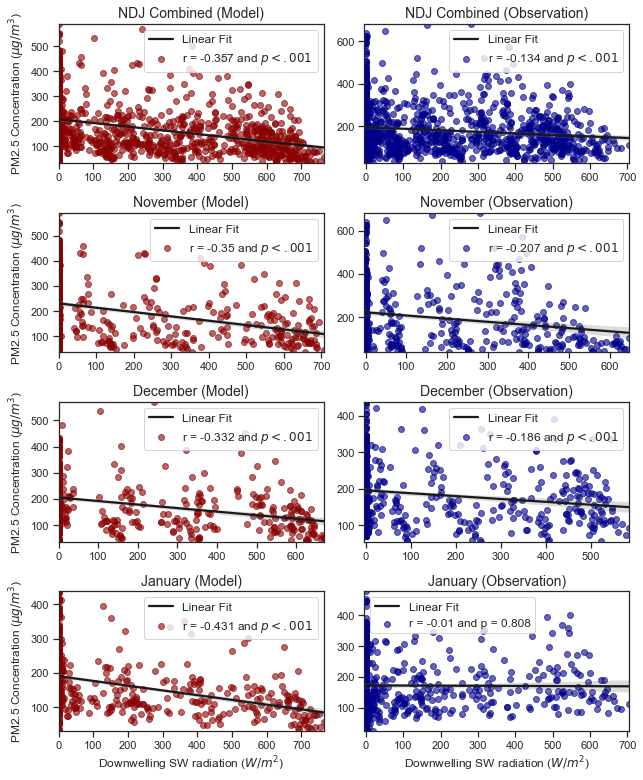

In [61]:
#### Downwelling SW radiation vs PM2.5

fig = plt.figure(figsize=(9,11))

# NDJ Combined
plt.subplot(421)
rplot.plot(swdown_aqi, swdown_aqi.dropna()['mod_swdown'], swdown_aqi.dropna()['mod_PM2.5'], type='compare', color='darkred', alpha=0.6)
# plt.xlabel("Downwelling SW radiation ($^{o}C$)", fontsize=12)
plt.ylabel("PM2.5 Concentration ($\mu g/m^3$)", fontsize=12)
plt.title("NDJ Combined (Model)", fontsize=14)

plt.subplot(422)
rplot.plot(swdown_aqi, swdown_aqi.dropna()['obs_swupper'], swdown_aqi.dropna()['obs_PM2.5'], type='compare', color='darkblue', alpha=0.6)
# plt.xlabel("Downwelling SW radiation ($^{o}C$)", fontsize=12)
# plt.ylabel("PM2.5 Concentration ($\mu g/m^3$)", fontsize=12)
plt.title("NDJ Combined (Observation)", fontsize=14)

# November
plt.subplot(423)
rplot.plot(swdown_aqi_nov, swdown_aqi_nov.dropna()['mod_swdown'], swdown_aqi_nov.dropna()['mod_PM2.5'], type='compare', color='darkred', alpha=0.6)
# plt.xlabel("Downwelling SW radiation ($^{o}C$)", fontsize=12)
plt.ylabel("PM2.5 Concentration ($\mu g/m^3$)", fontsize=12)
plt.title("November (Model)", fontsize=14)

plt.subplot(424)
rplot.plot(swdown_aqi_nov, swdown_aqi_nov.dropna()['obs_swupper'], swdown_aqi_nov.dropna()['obs_PM2.5'], type='compare', color='darkblue', alpha=0.6)
# plt.xlabel("Downwelling SW radiation ($^{o}C$)", fontsize=12)
# plt.ylabel("PM2.5 Concentration ($\mu g/m^3$)", fontsize=12)
plt.title("November (Observation)", fontsize=14)

# December
plt.subplot(425)
rplot.plot(swdown_aqi_dec, swdown_aqi_dec.dropna()['mod_swdown'], swdown_aqi_dec.dropna()['mod_PM2.5'], type='compare', color='darkred', alpha=0.6)
# plt.xlabel("Downwelling SW radiation ($^{o}C$)", fontsize=12)
plt.ylabel("PM2.5 Concentration ($\mu g/m^3$)", fontsize=12)
plt.title("December (Model)", fontsize=14)

plt.subplot(426)
rplot.plot(swdown_aqi_dec, swdown_aqi_dec.dropna()['obs_swupper'], swdown_aqi_dec.dropna()['obs_PM2.5'], type='compare', color='darkblue', alpha=0.6)
# plt.xlabel("Downwelling SW radiation ($^{o}C$)", fontsize=12)
# plt.ylabel("PM2.5 Concentration ($\mu g/m^3$)", fontsize=12)
plt.title("December (Observation)", fontsize=14)

# January
plt.subplot(427)
rplot.plot(swdown_aqi_jan, swdown_aqi_jan.dropna()['mod_swdown'], swdown_aqi_jan.dropna()['mod_PM2.5'], type='compare', color='darkred', alpha=0.6)
plt.xlabel("Downwelling SW radiation ($W/m^2$)", fontsize=12)
plt.ylabel("PM2.5 Concentration ($\mu g/m^3$)", fontsize=12)
plt.title("January (Model)", fontsize=14)

plt.subplot(428)
rplot.plot(swdown_aqi_jan, swdown_aqi_jan.dropna()['obs_swupper'], swdown_aqi_jan.dropna()['obs_PM2.5'], type='compare', color='darkblue', alpha=0.6)
plt.xlabel("Downwelling SW radiation ($W/m^2$)", fontsize=12)
# plt.ylabel("PM2.5 Concentration ($\mu g/m^3$)", fontsize=12)
plt.title("January (Observation)", fontsize=14)

# fig.suptitle('Scatter Plots for Downwelling SW radiation and PM2.5 Concentration', fontsize=27, y=0.99)
fig.tight_layout()
plt.savefig('./images/met_aqi_compare/swdown25.pdf', dpi=300)

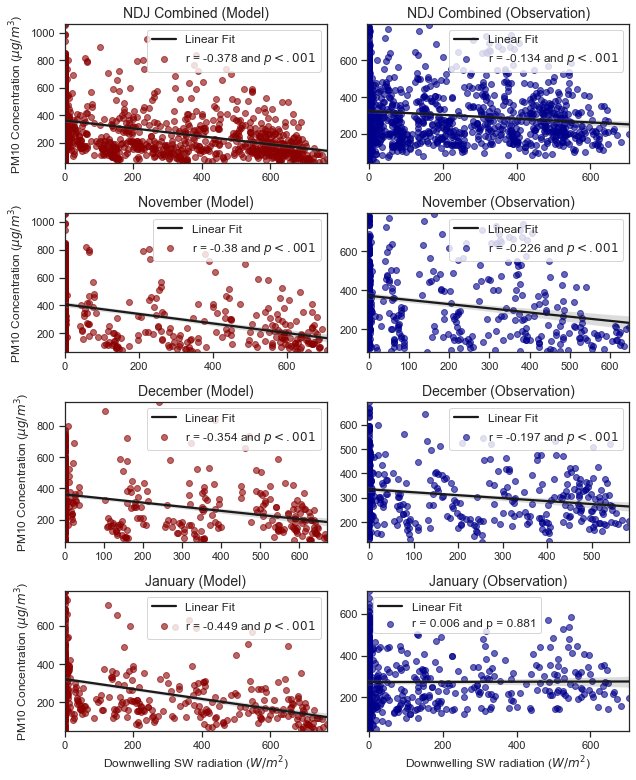

In [62]:
#### Downwelling SW radiation vs PM10

fig = plt.figure(figsize=(9,11))

# NDJ Combined
plt.subplot(421)
rplot.plot(swdown_aqi, swdown_aqi.dropna()['mod_swdown'], swdown_aqi.dropna()['mod_PM10'], type='compare', color='darkred', alpha=0.6)
# plt.xlabel("Downwelling SW radiation ($^{o}C$)", fontsize=12)
plt.ylabel("PM10 Concentration ($\mu g/m^3$)", fontsize=12)
plt.title("NDJ Combined (Model)", fontsize=14)

plt.subplot(422)
rplot.plot(swdown_aqi, swdown_aqi.dropna()['obs_swupper'], swdown_aqi.dropna()['obs_PM10'], type='compare', color='darkblue', alpha=0.6)
# plt.xlabel("Downwelling SW radiation ($^{o}C$)", fontsize=12)
# plt.ylabel("PM10 Concentration ($\mu g/m^3$)", fontsize=12)
plt.title("NDJ Combined (Observation)", fontsize=14)

# November
plt.subplot(423)
rplot.plot(swdown_aqi_nov, swdown_aqi_nov.dropna()['mod_swdown'], swdown_aqi_nov.dropna()['mod_PM10'], type='compare', color='darkred', alpha=0.6)
# plt.xlabel("Downwelling SW radiation ($^{o}C$)", fontsize=12)
plt.ylabel("PM10 Concentration ($\mu g/m^3$)", fontsize=12)
plt.title("November (Model)", fontsize=14)

plt.subplot(424)
rplot.plot(swdown_aqi_nov, swdown_aqi_nov.dropna()['obs_swupper'], swdown_aqi_nov.dropna()['obs_PM10'], type='compare', color='darkblue', alpha=0.6)
# plt.xlabel("Downwelling SW radiation ($^{o}C$)", fontsize=12)
# plt.ylabel("PM10 Concentration ($\mu g/m^3$)", fontsize=12)
plt.title("November (Observation)", fontsize=14)

# December
plt.subplot(425)
rplot.plot(swdown_aqi_dec, swdown_aqi_dec.dropna()['mod_swdown'], swdown_aqi_dec.dropna()['mod_PM10'], type='compare', color='darkred', alpha=0.6)
# plt.xlabel("Downwelling SW radiation ($^{o}C$)", fontsize=12)
plt.ylabel("PM10 Concentration ($\mu g/m^3$)", fontsize=12)
plt.title("December (Model)", fontsize=14)

plt.subplot(426)
rplot.plot(swdown_aqi_dec, swdown_aqi_dec.dropna()['obs_swupper'], swdown_aqi_dec.dropna()['obs_PM10'], type='compare', color='darkblue', alpha=0.6)
# plt.xlabel("Downwelling SW radiation ($^{o}C$)", fontsize=12)
# plt.ylabel("PM10 Concentration ($\mu g/m^3$)", fontsize=12)
plt.title("December (Observation)", fontsize=14)

# January
plt.subplot(427)
rplot.plot(swdown_aqi_jan, swdown_aqi_jan.dropna()['mod_swdown'], swdown_aqi_jan.dropna()['mod_PM10'], type='compare', color='darkred', alpha=0.6)
plt.xlabel("Downwelling SW radiation ($W/m^2$)", fontsize=12)
plt.ylabel("PM10 Concentration ($\mu g/m^3$)", fontsize=12)
plt.title("January (Model)", fontsize=14)

plt.subplot(428)
rplot.plot(swdown_aqi_jan, swdown_aqi_jan.dropna()['obs_swupper'], swdown_aqi_jan.dropna()['obs_PM10'], type='compare', color='darkblue', alpha=0.6)
plt.xlabel("Downwelling SW radiation ($W/m^2$)", fontsize=12)
# plt.ylabel("PM10 Concentration ($\mu g/m^3$)", fontsize=12)
plt.title("January (Observation)", fontsize=14)

# fig.suptitle('Scatter Plots for Downwelling SW radiation and PM10 Concentration', fontsize=27, y=0.99)
fig.tight_layout()
plt.savefig('./images/met_aqi_compare/swdown10.pdf', dpi=300)

#### WD

In [63]:
# #### WD vs PM2.5

# fig = plt.figure(figsize=(15,22))

# # NDJ Combined
# plt.subplot(421)
# rplot.plot(wd_aqi, wd_aqi.dropna()['mod_wd'], wd_aqi.dropna()['mod_PM2.5'], type='compare', color='darkred', alpha=0.6)
# # plt.xlabel("Downwelling SW radiation ($^{o}C$)", fontsize=12)
# plt.ylabel("PM2.5 Concentration ($\mu g/m^3$)", fontsize=12)
# plt.title("NDJ Combined (Model)", fontsize=16)

# plt.subplot(422)
# rplot.plot(wd_aqi, wd_aqi.dropna()['obs_wd'], wd_aqi.dropna()['obs_PM2.5'], type='compare', color='darkblue', alpha=0.6)
# # plt.xlabel("Downwelling SW radiation ($^{o}C$)", fontsize=12)
# # plt.ylabel("PM2.5 Concentration ($\mu g/m^3$)", fontsize=12)
# plt.title("NDJ Combined (Observation)", fontsize=16)

# # November
# plt.subplot(423)
# rplot.plot(wd_aqi_nov, wd_aqi_nov.dropna()['mod_wd'], wd_aqi_nov.dropna()['mod_PM2.5'], type='compare', color='darkred', alpha=0.6)
# # plt.xlabel("Downwelling SW radiation ($^{o}C$)", fontsize=12)
# plt.ylabel("PM2.5 Concentration ($\mu g/m^3$)", fontsize=12)
# plt.title("November (Model)", fontsize=16)

# plt.subplot(424)
# rplot.plot(wd_aqi_nov, wd_aqi_nov.dropna()['obs_wd'], wd_aqi_nov.dropna()['obs_PM2.5'], type='compare', color='darkblue', alpha=0.6)
# # plt.xlabel("Downwelling SW radiation ($^{o}C$)", fontsize=12)
# # plt.ylabel("PM2.5 Concentration ($\mu g/m^3$)", fontsize=12)
# plt.title("November (Observation)", fontsize=16)

# # December
# plt.subplot(425)
# rplot.plot(wd_aqi_dec, wd_aqi_dec.dropna()['mod_wd'], wd_aqi_dec.dropna()['mod_PM2.5'], type='compare', color='darkred', alpha=0.6)
# # plt.xlabel("Downwelling SW radiation ($^{o}C$)", fontsize=12)
# plt.ylabel("PM2.5 Concentration ($\mu g/m^3$)", fontsize=12)
# plt.title("December (Model)", fontsize=16)

# plt.subplot(426)
# rplot.plot(wd_aqi_dec, wd_aqi_dec.dropna()['obs_wd'], wd_aqi_dec.dropna()['obs_PM2.5'], type='compare', color='darkblue', alpha=0.6)
# # plt.xlabel("Downwelling SW radiation ($^{o}C$)", fontsize=12)
# # plt.ylabel("PM2.5 Concentration ($\mu g/m^3$)", fontsize=12)
# plt.title("December (Observation)", fontsize=16)

# # January
# plt.subplot(427)
# rplot.plot(wd_aqi_jan, wd_aqi_jan.dropna()['mod_wd'], wd_aqi_jan.dropna()['mod_PM2.5'], type='compare', color='darkred', alpha=0.6)
# plt.xlabel("Downwelling SW radiation (in deg.)", fontsize=12)
# plt.ylabel("PM2.5 Concentration ($\mu g/m^3$)", fontsize=12)
# plt.title("January (Model)", fontsize=16)

# plt.subplot(428)
# rplot.plot(wd_aqi_jan, wd_aqi_jan.dropna()['obs_wd'], wd_aqi_jan.dropna()['obs_PM2.5'], type='compare', color='darkblue', alpha=0.6)
# plt.xlabel("Downwelling SW radiation (in deg.)", fontsize=12)
# # plt.ylabel("PM2.5 Concentration ($\mu g/m^3$)", fontsize=12)
# plt.title("January (Observation)", fontsize=16)

# fig.suptitle('Scatter Plots for Wind Direction and PM2.5 Concentration', fontsize=27, y=0.99)
# fig.tight_layout()
# plt.savefig('./images/met_aqi_compare/wd25.pdf', dpi=300)

In [64]:
# #### WD vs PM10

# fig = plt.figure(figsize=(15,22))

# # NDJ Combined
# plt.subplot(421)
# rplot.plot(wd_aqi, wd_aqi.dropna()['mod_wd'], wd_aqi.dropna()['mod_PM10'], type='compare', color='darkred', alpha=0.6)
# # plt.xlabel("Downwelling SW radiation ($^{o}C$)", fontsize=12)
# plt.ylabel("PM10 Concentration ($\mu g/m^3$)", fontsize=12)
# plt.title("NDJ Combined (Model)", fontsize=16)

# plt.subplot(422)
# rplot.plot(wd_aqi, wd_aqi.dropna()['obs_wd'], wd_aqi.dropna()['obs_PM10'], type='compare', color='darkblue', alpha=0.6)
# # plt.xlabel("Downwelling SW radiation ($^{o}C$)", fontsize=12)
# # plt.ylabel("PM10 Concentration ($\mu g/m^3$)", fontsize=12)
# plt.title("NDJ Combined (Observation)", fontsize=16)

# # November
# plt.subplot(423)
# rplot.plot(wd_aqi_nov, wd_aqi_nov.dropna()['mod_wd'], wd_aqi_nov.dropna()['mod_PM10'], type='compare', color='darkred', alpha=0.6)
# # plt.xlabel("Downwelling SW radiation ($^{o}C$)", fontsize=12)
# plt.ylabel("PM10 Concentration ($\mu g/m^3$)", fontsize=12)
# plt.title("November (Model)", fontsize=16)

# plt.subplot(424)
# rplot.plot(wd_aqi_nov, wd_aqi_nov.dropna()['obs_wd'], wd_aqi_nov.dropna()['obs_PM10'], type='compare', color='darkblue', alpha=0.6)
# # plt.xlabel("Downwelling SW radiation ($^{o}C$)", fontsize=12)
# # plt.ylabel("PM10 Concentration ($\mu g/m^3$)", fontsize=12)
# plt.title("November (Observation)", fontsize=16)

# # December
# plt.subplot(425)
# rplot.plot(wd_aqi_dec, wd_aqi_dec.dropna()['mod_wd'], wd_aqi_dec.dropna()['mod_PM10'], type='compare', color='darkred', alpha=0.6)
# # plt.xlabel("Downwelling SW radiation ($^{o}C$)", fontsize=12)
# plt.ylabel("PM10 Concentration ($\mu g/m^3$)", fontsize=12)
# plt.title("December (Model)", fontsize=16)

# plt.subplot(426)
# rplot.plot(wd_aqi_dec, wd_aqi_dec.dropna()['obs_wd'], wd_aqi_dec.dropna()['obs_PM10'], type='compare', color='darkblue', alpha=0.6)
# # plt.xlabel("Downwelling SW radiation ($^{o}C$)", fontsize=12)
# # plt.ylabel("PM10 Concentration ($\mu g/m^3$)", fontsize=12)
# plt.title("December (Observation)", fontsize=16)

# # January
# plt.subplot(427)
# rplot.plot(wd_aqi_jan, wd_aqi_jan.dropna()['mod_wd'], wd_aqi_jan.dropna()['mod_PM10'], type='compare', color='darkred', alpha=0.6)
# plt.xlabel("Downwelling SW radiation (in deg.)", fontsize=12)
# plt.ylabel("PM10 Concentration ($\mu g/m^3$)", fontsize=12)
# plt.title("January (Model)", fontsize=16)

# plt.subplot(428)
# rplot.plot(wd_aqi_jan, wd_aqi_jan.dropna()['obs_wd'], wd_aqi_jan.dropna()['obs_PM10'], type='compare', color='darkblue', alpha=0.6)
# plt.xlabel("Downwelling SW radiation (in deg.)", fontsize=12)
# # plt.ylabel("PM10 Concentration ($\mu g/m^3$)", fontsize=12)
# plt.title("January (Observation)", fontsize=16)

# fig.suptitle('Scatter Plots for Wind Direction and PM10 Concentration', fontsize=27, y=0.99)
# fig.tight_layout()
# plt.savefig('./images/met_aqi_compare/wd10.pdf', dpi=300)

#### WS

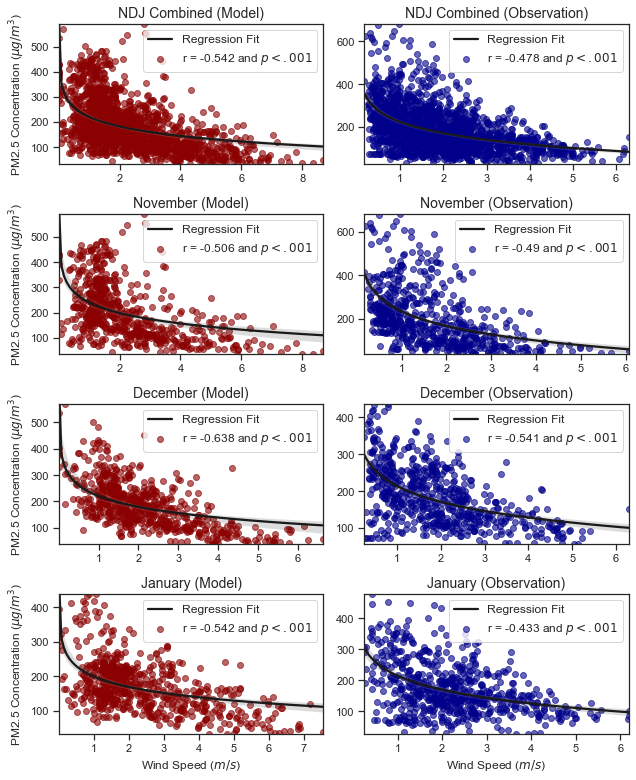

In [65]:
#### ws vs PM2.5

fig = plt.figure(figsize=(9,11))

# NDJ Combined
plt.subplot(421)
rplot.plot(ws_aqi, ws_aqi.dropna()['mod_ws'], ws_aqi.dropna()['mod_PM2.5'], type='logistic', color='darkred', alpha=0.6)
# plt.xlabel("Downwelling SW radiation ($^{o}C$)", fontsize=12)
plt.ylabel("PM2.5 Concentration ($\mu g/m^3$)", fontsize=12)
plt.title("NDJ Combined (Model)", fontsize=14)

plt.subplot(422)
rplot.plot(ws_aqi, ws_aqi.dropna()['obs_ws'], ws_aqi.dropna()['obs_PM2.5'], type='logistic', color='darkblue', alpha=0.6)
# plt.xlabel("Downwelling SW radiation ($^{o}C$)", fontsize=12)
# plt.ylabel("PM2.5 Concentration ($\mu g/m^3$)", fontsize=12)
plt.title("NDJ Combined (Observation)", fontsize=14)

# November
plt.subplot(423)
rplot.plot(ws_aqi_nov, ws_aqi_nov.dropna()['mod_ws'], ws_aqi_nov.dropna()['mod_PM2.5'], type='logistic', color='darkred', alpha=0.6)
# plt.xlabel("Downwelling SW radiation ($^{o}C$)", fontsize=12)
plt.ylabel("PM2.5 Concentration ($\mu g/m^3$)", fontsize=12)
plt.title("November (Model)", fontsize=14)

plt.subplot(424)
rplot.plot(ws_aqi_nov, ws_aqi_nov.dropna()['obs_ws'], ws_aqi_nov.dropna()['obs_PM2.5'], type='logistic', color='darkblue', alpha=0.6)
# plt.xlabel("Downwelling SW radiation ($^{o}C$)", fontsize=12)
# plt.ylabel("PM2.5 Concentration ($\mu g/m^3$)", fontsize=12)
plt.title("November (Observation)", fontsize=14)

# December
plt.subplot(425)
rplot.plot(ws_aqi_dec, ws_aqi_dec.dropna()['mod_ws'], ws_aqi_dec.dropna()['mod_PM2.5'], type='logistic', color='darkred', alpha=0.6)
# plt.xlabel("Downwelling SW radiation ($^{o}C$)", fontsize=12)
plt.ylabel("PM2.5 Concentration ($\mu g/m^3$)", fontsize=12)
plt.title("December (Model)", fontsize=14)

plt.subplot(426)
rplot.plot(ws_aqi_dec, ws_aqi_dec.dropna()['obs_ws'], ws_aqi_dec.dropna()['obs_PM2.5'], type='logistic', color='darkblue', alpha=0.6)
# plt.xlabel("Downwelling SW radiation ($^{o}C$)", fontsize=12)
# plt.ylabel("PM2.5 Concentration ($\mu g/m^3$)", fontsize=12)
plt.title("December (Observation)", fontsize=14)

# January
plt.subplot(427)
rplot.plot(ws_aqi_jan, ws_aqi_jan.dropna()['mod_ws'], ws_aqi_jan.dropna()['mod_PM2.5'], type='logistic', color='darkred', alpha=0.6)
plt.xlabel("Wind Speed ($m/s$)", fontsize=12)
plt.ylabel("PM2.5 Concentration ($\mu g/m^3$)", fontsize=12)
plt.title("January (Model)", fontsize=14)

plt.subplot(428)
rplot.plot(ws_aqi_jan, ws_aqi_jan.dropna()['obs_ws'], ws_aqi_jan.dropna()['obs_PM2.5'], type='logistic', color='darkblue', alpha=0.6)
plt.xlabel("Wind Speed ($m/s$)", fontsize=12)
# plt.ylabel("PM2.5 Concentration ($\mu g/m^3$)", fontsize=12)
plt.title("January (Observation)", fontsize=14)

# fig.suptitle('Scatter Plots for Wind Speed and PM2.5 Concentration', fontsize=27, y=0.99)
fig.tight_layout()
plt.savefig('./images/met_aqi_compare/ws25.pdf', dpi=300)

In [ ]:
#### ws vs PM10

fig = plt.figure(figsize=(9,11))

# NDJ Combined
plt.subplot(421)
rplot.plot(ws_aqi, ws_aqi.dropna()['mod_ws'], ws_aqi.dropna()['mod_PM10'], type='logistic', color='darkred', alpha=0.6)
# plt.xlabel("Downwelling SW radiation ($^{o}C$)", fontsize=12)
plt.ylabel("PM10 Concentration ($\mu g/m^3$)", fontsize=12)
plt.title("NDJ Combined (Model)", fontsize=14)

plt.subplot(422)
rplot.plot(ws_aqi, ws_aqi.dropna()['obs_ws'], ws_aqi.dropna()['obs_PM10'], type='logistic', color='darkblue', alpha=0.6)
# plt.xlabel("Downwelling SW radiation ($^{o}C$)", fontsize=12)
# plt.ylabel("PM10 Concentration ($\mu g/m^3$)", fontsize=12)
plt.title("NDJ Combined (Observation)", fontsize=14)

# November
plt.subplot(423)
rplot.plot(ws_aqi_nov, ws_aqi_nov.dropna()['mod_ws'], ws_aqi_nov.dropna()['mod_PM10'], type='logistic', color='darkred', alpha=0.6)
# plt.xlabel("Downwelling SW radiation ($^{o}C$)", fontsize=12)
plt.ylabel("PM10 Concentration ($\mu g/m^3$)", fontsize=12)
plt.title("November (Model)", fontsize=14)

plt.subplot(424)
rplot.plot(ws_aqi_nov, ws_aqi_nov.dropna()['obs_ws'], ws_aqi_nov.dropna()['obs_PM10'], type='logistic', color='darkblue', alpha=0.6)
# plt.xlabel("Downwelling SW radiation ($^{o}C$)", fontsize=12)
# plt.ylabel("PM10 Concentration ($\mu g/m^3$)", fontsize=12)
plt.title("November (Observation)", fontsize=14)

# December
plt.subplot(425)
rplot.plot(ws_aqi_dec, ws_aqi_dec.dropna()['mod_ws'], ws_aqi_dec.dropna()['mod_PM10'], type='logistic', color='darkred', alpha=0.6)
# plt.xlabel("Downwelling SW radiation ($^{o}C$)", fontsize=12)
plt.ylabel("PM10 Concentration ($\mu g/m^3$)", fontsize=12)
plt.title("December (Model)", fontsize=14)

plt.subplot(426)
rplot.plot(ws_aqi_dec, ws_aqi_dec.dropna()['obs_ws'], ws_aqi_dec.dropna()['obs_PM10'], type='logistic', color='darkblue', alpha=0.6)
# plt.xlabel("Downwelling SW radiation ($^{o}C$)", fontsize=12)
# plt.ylabel("PM10 Concentration ($\mu g/m^3$)", fontsize=12)
plt.title("December (Observation)", fontsize=14)

# January
plt.subplot(427)
rplot.plot(ws_aqi_jan, ws_aqi_jan.dropna()['mod_ws'], ws_aqi_jan.dropna()['mod_PM10'], type='logistic', color='darkred', alpha=0.6)
plt.xlabel("Wind Speed ($m/s$)", fontsize=12)
plt.ylabel("PM10 Concentration ($\mu g/m^3$)", fontsize=12)
plt.title("January (Model)", fontsize=14)

plt.subplot(428)
rplot.plot(ws_aqi_jan, ws_aqi_jan.dropna()['obs_ws'], ws_aqi_jan.dropna()['obs_PM10'], type='logistic', color='darkblue', alpha=0.6)
plt.xlabel("Wind Speed ($m/s$)", fontsize=12)
# plt.ylabel("PM10 Concentration ($\mu g/m^3$)", fontsize=12)
plt.title("January (Observation)", fontsize=14)

# fig.suptitle('Scatter Plots for Wind Speed and PM10 Concentration', fontsize=27, y=0.99)
fig.tight_layout()
plt.savefig('./images/met_aqi_compare/ws10.pdf', dpi=300)

## Get daily data

In [ ]:
temp_aqi_daily = temp_aqi.resample('D').mean()
swdown_aqi_daily = swdown_aqi.resample('D').mean()
ws_aqi_daily = ws_aqi.resample('D').mean()
wd_aqi_daily = wd_aqi.resample('D').mean()

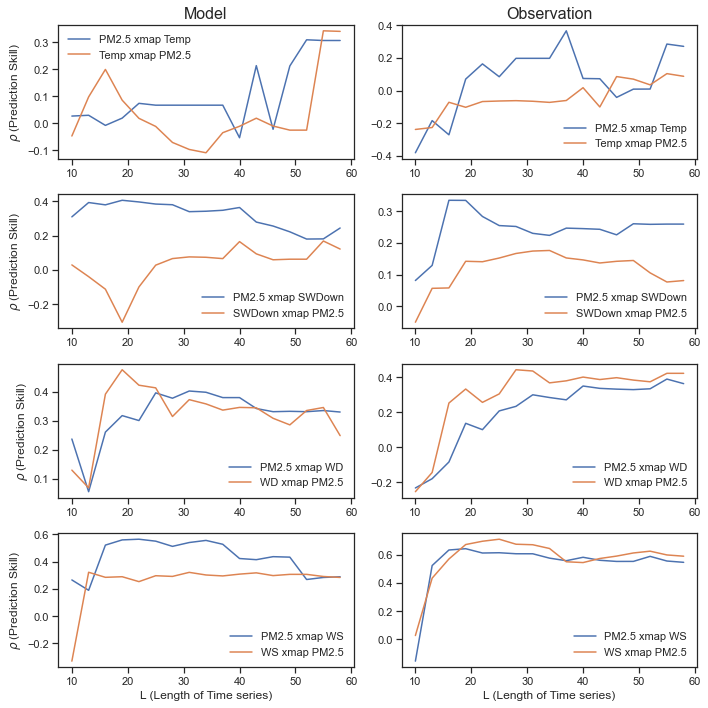

In [28]:
#### Temperature vs PM2.5 CCM

fig = plt.figure(figsize=(10,10))

# NDJ Combined
# rplot.plot(temp_aqi_daily, temp_aqi_daily.dropna()['mod_temp'], temp_aqi_daily.dropna()['mod_PM2.5'], type='compare', color='darkred', alpha=0.6)

plt.subplot(421)
ccmplot.plot(temp_aqi_daily.dropna()['mod_PM2.5'], temp_aqi_daily.dropna()['mod_temp'], ["PM2.5", "Temp"])
# plt.xlabel("Library Length", fontsize=12)
plt.ylabel("$\\rho$ (Prediction Skill)", fontsize=12)
plt.title("Model", fontsize=16)

plt.subplot(422)
ccmplot.plot(temp_aqi_daily.dropna()["obs_PM2.5"], temp_aqi_daily.dropna()['obs_temp'], ["PM2.5", "Temp"])
# plt.xlabel("Library Length", fontsize=12)
# plt.ylabel("$\\rho$ (Prediction Skill)", fontsize=12)
plt.title("Observation", fontsize=16)

plt.subplot(423)
ccmplot.plot(swdown_aqi_daily.dropna()['mod_PM2.5'], swdown_aqi_daily.dropna()['mod_swdown'], ["PM2.5", "SWDown"])
# plt.xlabel("Library Length", fontsize=12)
plt.ylabel("$\\rho$ (Prediction Skill)", fontsize=12)

plt.subplot(424)
ccmplot.plot(swdown_aqi_daily.dropna()["obs_PM2.5"], swdown_aqi_daily.dropna()['obs_swupper'], ["PM2.5", "SWDown"])
# plt.xlabel("Library Length", fontsize=12)
# plt.ylabel("$\\rho$ (Prediction Skill)", fontsize=12)

plt.subplot(425)
ccmplot.plot(wd_aqi_daily.dropna()['mod_PM2.5'], wd_aqi_daily.dropna()['mod_wd'], ["PM2.5", "WD"])
# plt.xlabel("Library Length", fontsize=12)
plt.ylabel("$\\rho$ (Prediction Skill)", fontsize=12)

plt.subplot(426)
ccmplot.plot(wd_aqi_daily.dropna()["obs_PM2.5"], wd_aqi_daily.dropna()['obs_wd'], ["PM2.5", "WD"])
# plt.xlabel("Library Length", fontsize=12)
# plt.ylabel("$\\rho$ (Prediction Skill)", fontsize=12)

plt.subplot(427)
ccmplot.plot(ws_aqi_daily.dropna()['mod_PM2.5'], ws_aqi_daily.dropna()['mod_ws'], ["PM2.5", "WS"])
plt.xlabel("L (Length of Time series)", fontsize=12)
plt.ylabel("$\\rho$ (Prediction Skill)", fontsize=12)

plt.subplot(428)
ccmplot.plot(ws_aqi_daily.dropna()["obs_PM2.5"], ws_aqi_daily.dropna()['obs_ws'], ["PM2.5", "WS"])
plt.xlabel("L (Length of Time series)", fontsize=12)
fig.tight_layout()
# plt.ylabel("$\\rho$ (Prediction Skill)", fontsize=12)
plt.savefig('./images/extra/ccm25.pdf', dpi=300)

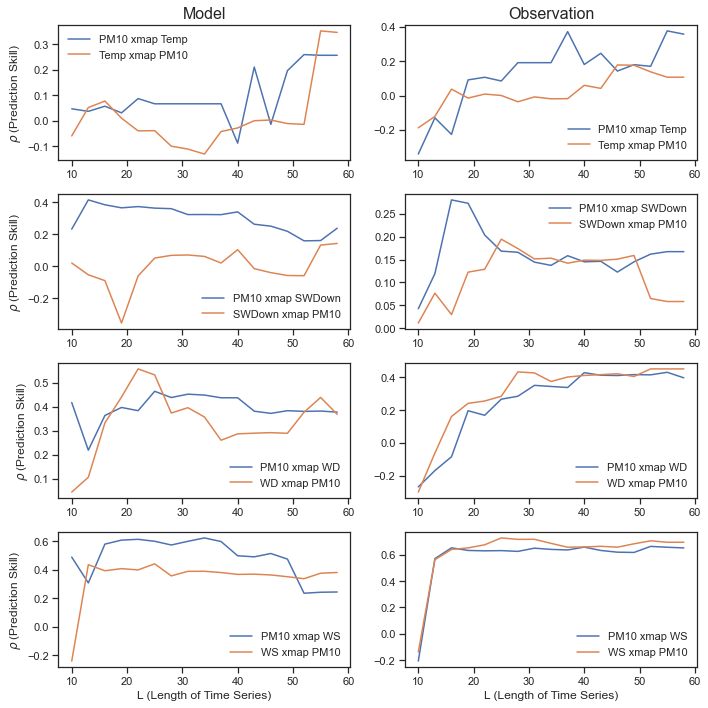

In [29]:
#### Temperature vs PM10 CCM

fig = plt.figure(figsize=(10,10))

# NDJ Combined
# rplot.plot(temp_aqi_daily, temp_aqi_daily.dropna()['mod_temp'], temp_aqi_daily.dropna()['mod_PM10'], type='compare', color='darkred', alpha=0.6)

plt.subplot(421)
ccmplot.plot(temp_aqi_daily.dropna()['mod_PM10'], temp_aqi_daily.dropna()['mod_temp'], ["PM10", "Temp"])
# plt.xlabel("Library Length", fontsize=12)
plt.ylabel("$\\rho$ (Prediction Skill)", fontsize=12)
plt.title("Model", fontsize=16)

plt.subplot(422)
ccmplot.plot(temp_aqi_daily.dropna()["obs_PM10"], temp_aqi_daily.dropna()['obs_temp'], ["PM10", "Temp"])
# plt.xlabel("Library Length", fontsize=12)
# plt.ylabel("$\\rho$ (Prediction Skill)", fontsize=12)
plt.title("Observation", fontsize=16)

plt.subplot(423)
ccmplot.plot(swdown_aqi_daily.dropna()['mod_PM10'], swdown_aqi_daily.dropna()['mod_swdown'], ["PM10", "SWDown"])
# plt.xlabel("Library Length", fontsize=12)
plt.ylabel("$\\rho$ (Prediction Skill)", fontsize=12)

plt.subplot(424)
ccmplot.plot(swdown_aqi_daily.dropna()["obs_PM10"], swdown_aqi_daily.dropna()['obs_swupper'], ["PM10", "SWDown"])
# plt.xlabel("Library Length", fontsize=12)
# plt.ylabel("$\\rho$ (Prediction Skill)", fontsize=12)

plt.subplot(425)
ccmplot.plot(wd_aqi_daily.dropna()['mod_PM10'], wd_aqi_daily.dropna()['mod_wd'], ["PM10", "WD"])
# plt.xlabel("Library Length", fontsize=12)
plt.ylabel("$\\rho$ (Prediction Skill)", fontsize=12)

plt.subplot(426)
ccmplot.plot(wd_aqi_daily.dropna()["obs_PM10"], wd_aqi_daily.dropna()['obs_wd'], ["PM10", "WD"])
# plt.xlabel("Library Length", fontsize=12)
# plt.ylabel("$\\rho$ (Prediction Skill)", fontsize=12)

plt.subplot(427)
ccmplot.plot(ws_aqi_daily.dropna()['mod_PM10'], ws_aqi_daily.dropna()['mod_ws'], ["PM10", "WS"])
plt.xlabel("L (Length of Time Series)", fontsize=12)
plt.ylabel("$\\rho$ (Prediction Skill)", fontsize=12)

plt.subplot(428)
ccmplot.plot(ws_aqi_daily.dropna()["obs_PM10"], ws_aqi_daily.dropna()['obs_ws'], ["PM10", "WS"])
plt.xlabel("L (Length of Time Series)", fontsize=12)
# plt.ylabel("$\\rho$ (Prediction Skill)", fontsize=12)
fig.tight_layout()
plt.savefig('./images/extra/ccm10.pdf', dpi=300)